In [8]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1337)

In [9]:
X = np.linspace(-1,1,200)
np.random.shuffle(X)  # randomize the data
Y = 0.5*X + np.random.normal(0,0.05, (200,))

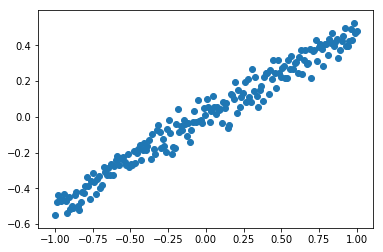

In [10]:
plt.scatter(X,Y)
plt.show()

In [11]:
X_train,Y_train = X[:160],Y[:160]
X_test, Y_test = X[160:],Y[160:]

# build a neural network
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1))
#model.add(Dense(output_dim=1,))

# choose loss function and optimize method
model.compile(loss='mse',optimizer='sgd')

# training
print('Training....')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step%100==0:
        print('Train cost:',cost)


# test
print('Testing...')
cost = model.evaluate(X_test,Y_test,40)
print('Test cost:',cost)
W,b = model.layers[0].get_weights()
print('Weight:',W,"\nbiases:"+b)

# ploting and prediction
Y_pred = model.predict(X_test)
plot.scatter(X_test,Y_test)
plot.plot(X_test,Y_pred)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  


Training....
Train cost: 0.00347699
Train cost: 0.00283271
Train cost: 0.00267503
Train cost: 0.00263505
Testing...
40/40 [==============================] - 0s
Test cost: 0.00330106099136


TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')